In [163]:
import cantera as ct
import numpy as np
import csv

# %config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt

print('running cantera version: ' + ct.__version__)

running cantera version: 3.0.0


In [164]:
# Create a Cantera solution object for the solid propellant.
gas = ct.Solution("data/ss_mech.yaml")

C:\Users\tahze\AppData\Local\Temp\ipykernel_29584\2558627316.py:2: UserWarning: NasaPoly2::validate: 
For species H2O, discontinuity in cp/R detected at Tmid = 18.01
	Value computed using low-temperature polynomial:  4.1640474673509615
	Value computed using high-temperature polynomial: 2.7303344722452962

  gas = ct.Solution("data/ss_mech.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_29584\2558627316.py:2: UserWarning: NasaPoly2::validate: 
For species H2O, discontinuity in h/RT detected at Tmid = 18.01
	Value computed using low-temperature polynomial:  -1677.869344773688
	Value computed using high-temperature polynomial: -1656.701813502562

  gas = ct.Solution("data/ss_mech.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_29584\2558627316.py:2: UserWarning: NasaPoly2::validate: 
For species H2O, discontinuity in s/R detected at Tmid = 18.01
	Value computed using low-temperature polynomial:  11.253302479772398
	Value computed using high-temperature polynomial: 14.675098919376222

In [165]:
reactor_T = 2050.0 # temp of AP premixed flame
reactor_P = 101325 # Pa

gas.set_equivalence_ratio(phi=1.0, fuel="C2H4", oxidizer={"NH3": 1.0, "HCLO4": 1.0})

gas.TP = reactor_T, reactor_P

In [166]:
gas()


  gas:

       temperature   2050 K
          pressure   1.0132e+05 Pa
           density   0.32314 kg/m^3
  mean mol. weight   54.358 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        1.9048e+06        1.0354e+08  J
   internal energy        1.5913e+06          8.65e+07  J
           entropy            6281.3        3.4144e+05  J/K
    Gibbs function       -1.0972e+07       -5.9641e+08  J
 heat capacity c_p            1350.9             73431  J/K
 heat capacity c_v            1197.9             65116  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
              C2H4          0.073728           0.14286           -34.589
               NH3           0.13428           0.42857           -32.802
             HCLO4             0.792           0.42857           -37.314


In [167]:
reactor = ct.IdealGasReactor(contents=gas)

In [168]:
reactor_network = ct.ReactorNet([reactor])

In [169]:
# solution array with time
time_history = ct.SolutionArray(gas, extra = 't')

In [170]:
est_ignition_delay_time = 2.5e3

t = 0

while t < est_ignition_delay_time:
    t = reactor_network.step()

    time_history.append(reactor.thermo.state, t=t)

In [171]:
time_history

           T         D          H2O            O  ...           H2           OH            t
0    2050.00  0.323144  2.52092e-16  1.22884e-87  ...  7.17441e-87  2.01745e-86  6.34172e-13
1    2050.00  0.323144  2.52117e-12  4.07075e-67  ...  2.37665e-66  6.68316e-66  6.34236e-09
2    2050.00  0.323144  2.77304e-11  8.13702e-62  ...  4.75069e-61  1.33590e-60  6.97596e-08
3    2050.00  0.323144  2.79823e-10  1.13942e-56  ...  6.65235e-56  1.87064e-55  7.03932e-07
4    2050.00  0.323144  2.80074e-09  1.02855e-51  ...  6.00503e-51  1.68862e-50  7.04565e-06
..       ...       ...          ...          ...  ...          ...          ...          ...
330  3862.06  0.323144  2.25185e-01  2.78113e-10  ...  1.62372e-09  4.56592e-09  2.42340e+03
331  3862.38  0.323144  2.25235e-01  2.81590e-10  ...  1.64402e-09  4.62300e-09  2.44610e+03
332  3862.70  0.323144  2.25285e-01  2.85070e-10  ...  1.66434e-09  4.68014e-09  2.46881e+03
333  3863.01  0.323144  2.25333e-01  2.88554e-10  ...  1.68468e-09  4.

In [172]:
ref_species = 'O2'

i_ign = time_history(ref_species).Y.argmax()
tau = time_history.t[i_ign]

print(f"computed ignition delay: {tau:.3e} seconds")

computed ignition delay: 2.514e+03 seconds


Text(0, 0.5, 'Y (O2)')

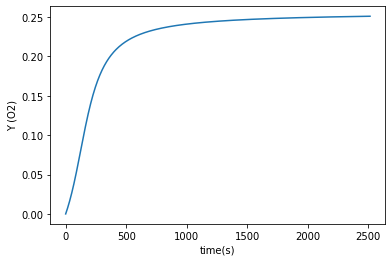

In [173]:
plt.plot(time_history.t, time_history(ref_species).Y)
plt.xlabel('time(s)')
plt.ylabel("Y ({0})".format(ref_species))

In [174]:
)')
plt.grid()
plt.show()

SyntaxError: unmatched ')' (624495093.py, line 1)

In [ ]:
gas()


  gas:

       temperature   3863.3 K
          pressure   3.6169e+05 Pa
           density   0.32314 kg/m^3
  mean mol. weight   28.698 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        2.7106e+06        7.7788e+07  J
   internal energy        1.5913e+06        4.5667e+07  J
           entropy             10856        3.1156e+05  J/K
    Gibbs function       -3.9231e+07       -1.1259e+09  J
 heat capacity c_p            1889.9             54237  J/K
 heat capacity c_v            1600.2             45923  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               H2O           0.22538           0.35903           -38.028
                 O        2.9204e-10        5.2384e-10           -35.875
                O2           0.25082           0.22495           -31.52

In [ ]:
diagram = ct.ReactionPathDiagram(gas, 'N')
diagram.show_details = True
diagram.font = 'CMU Serif'

In [ ]:
import pydot

In [ ]:
# save dot file
dot_file = 'N_ReactionPathDiagram.dot'

diagram.write_dot(dot_file)

In [ ]:

# # Plot the burn rate vs. pressure
# plt.plot(pressures, burn_rates)
# plt.xlabel('Pressure (MPa)')
# plt.ylabel('Burn Rate (cm/s)')
# plt.title('Burn Rate vs. Pressure')
# plt.grid()
# plt.show()